# BT03: Tiền xử lý và mô hình hóa dữ liệu

(Cập nhật 27/12/2020)

Họ tên: Trần Thanh Tùng

MSSV: 18120258

---

## Cách làm bài và nộp bài
&#9889; Bạn lưu ý là mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.


*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>. Bạn có thể thảo luận ý tưởng với bạn khác, nhưng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font>. <font color=red>Nếu vi phạm thì sẽ bị 0 điểm cho toàn bộ môn học.</font>*

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `BT03-TienXuLy_MoHinhHoa.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. <font color=red>Bạn lưu ý tuân thủ chính xác cấu trúc này.</font>

---

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

# You can also import other things ...
# YOUR CODE HERE (OPTION)

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

---

## Thu thập dữ liệu
Bộ dữ liệu được sử dụng trong bài tập là bộ dữ liệu đã được thu thập sẵn cho [một cuộc thi trên Kaggle](https://www.kaggle.com/c/titanic); bộ dữ liệu này là về thông tin của các hành khách trên chuyến tàu Titanic mà đã bị chìm do đâm phải tảng băng trôi vào năm 1912 (chắc bạn cũng có biết). Ban đầu, mình định sử dụng bộ dữ liệu về giá nhà cho bài tập này (như mình có nói trên lớp); tuy nhiên, các bộ dữ liệu về giá nhà mà mình tìm được không có những đặc điểm mà mình muốn (mình muốn dữ liệu có giá trị thiếu, có các cột dạng chuỗi, ... để bạn có thể thực hành tiền xử lý các vấn đề này). Do đó, mình đã đổi sang bộ dữ liệu này (do mình không sử dụng bộ dữ liệu về giá nhà nữa nên cũng không còn yêu cầu tránh bộ dữ liệu này trong đồ án cuối kỳ).

Cuộc thi trên Kaggle với bộ dữ liệu này là về mô hình hóa dữ liệu nên Kaggle đã tách sẵn tập huấn luyện và tập kiểm tra. Mình có đính kèm các file dữ liệu mà Kaggle cung cấp: 
- File "train.csv": tập huấn luyện
- File "test.csv": tập kiểm tra (chỉ có input, dùng để submit kết quả dự đoán của mô hình sau cùng lên Kaggle)
- File "description.txt": mô tả ý nghĩa của các cột

---

## Khám phá dữ liệu (đủ để có thể xác định câu hỏi)

In [3]:
data_df = pd.read_csv('train.csv', 
                      index_col=0) # Cho cột index là cột 0 (PassengerId)
data_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
data_df.shape

(891, 11)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một hành khách, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

In [5]:
data_df.index.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

Xem file "description.txt".

In [6]:
with open('description.txt', 'r') as f:
    print(f.read())

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard

---

Khám phá dữ liệu đến đây là đã đủ để có thể đưa ra câu hỏi cần trả lời. Sau khi đưa ra câu hỏi cần trả lời thì ta sẽ tiến hành ngay bước tiền xử lý là tách ra tập validation và tập kiểm tra (ở bài tập này thì chỉ tách tập validation, vì tập kiểm tra đã được Kaggle tách ra trước đó). Sau đó, ta có thể tiếp tục khám phá trên *tập huấn luyện* (tập mà đã tách ra tập validation và tập kiểm tra) để hiểu hơn về dữ liệu.

Sở dĩ ta cần *tách sớm tập validation và tập kiểm tra* vì 2 tập này (đặc biệt là tập kiểm tra) cần phải được giữ bí mật để kết quả đánh giá được khách quan. Nếu ta khám phá dữ liệu nhiều quá, hiểu dữ liệu nhiều quá rồi mới tách các tập thì kết quả trên tập validation và tập kiểm tra có thể sẽ không được khách quan vì ta có thể dùng các hiểu biết khi khám phá dữ liệu (có tập validation và tập kiểm tra trong đó) để đưa ra các lựa chọn khi tiền xử lý và mô hình hóa dữ liệu (ở đây, mình muốn nói đến các hiểu biết mà chỉ đúng với tập dữ liệu cụ thể này chứ không thật sự là đúng).

---

## Đưa ra câu hỏi cần trả lời

Quan trọng nhất ở bước này là ta phải xác định đâu là cột ouput. Về các cột input, nếu được thì ta cố gắng xác định những cột nào sẽ không dùng đến dựa vào ý nghĩa của các cột và sẽ bỏ luôn các cột này để đơn giản hóa cho các bước lúc sau (nhất là trong trường hợp dữ liệu có nhiều cột); với những cột mà không chắc chắn là nên bỏ hay nên giữ thì tạm cứ để đó, và ta sẽ làm ở bước tiền xử lý lúc sau.

Trong cuộc thi trên Kaggle với bộ dữ liệu này, cột output đã được chỉ định sẵn là cột "survival" (sống/chết). Như vậy câu hỏi cần trả lời là: 

*Output - sống/chết -* được tính từ *input - các thông tin của hành khách -* theo công thức nào?

Tạm thời ta sẽ để input là toàn bộ thông tin của hành khách, ta sẽ xác định cụ thể hơn ở bước tiền xử lý lúc sau.

Việc tìm ra câu trả lời này cho câu hỏi này thật ra không có nhiều ý nghĩa trong thực tế; mục đích chính của cuộc thi này và của bài tập này là để tập luyện tiền xử lý + mô hình hóa dữ liệu. Trong đồ án cuối kỳ thì bạn cần giải thích để người đọc thấy được ý nghĩa thực tế của việc đi tìm câu trả lời cho câu hỏi.

---

## Khám phá dữ liệu (để biết cách tách các tập)
Để biết cách tách các tập thì ta cần khám phá thêm cột output một ít:
- Cột này hiện có kiểu dữ liệu là gì? Trong bài toán hồi qui thì cột output bắt buộc phải có dạng số; nếu hiện chưa có dạng số (ví dụ, số nhưng được lưu dưới dạng chuỗi) thì ta cần chuyển sang dạng số rồi mới tách các tập.
- Cột này có giá trị thiếu không? Nếu có giá trị thiếu thì ta sẽ bỏ các dòng mà output có giá trị thiếu rồi mới tách các tập (loại học mà học từ dữ liệu trong đó output có giá trị thiếu được gọi là semi-supervised learning; trong phạm vi môn học, ta không đụng tới loại học này).
- Nếu cột này có dạng categorical (phân lớp) thì tỉ lệ các lớp như thế nào? Nếu tỉ lệ các lớp bị chênh lệch nhau quá nhiều thì có thể ta sẽ cần qua lại bước thu thập dữ liệu và thu thập thêm để cho tỉ lệ các lớp không bị chênh lệnh quá nhiều (hoặc khi đánh giá ta cần có một độ lỗi phù hợp).

In [7]:
# Cột output hiện có kiểu dữ liệu gì?
data_df['Survived'].dtype

dtype('int64')

In [8]:
# Cột output có giá trị thiếu không?
data_df['Survived'].isna().sum()

0

In [9]:
# Tỉ lệ các lớp trong cột output?
data_df['Survived'].value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

OK, như vậy là không có vấn đề gì cả.

---

## Tiền xử lý (tách các tập)

Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập validation và tập kiểm tra ra (trong bài tập này thì chỉ tách tập validation).

In [10]:
# Tách X và y
y_sr = data_df["Survived"] # sr là viết tắt của series
X_df = data_df.drop("Survived", axis=1)

In [11]:
# Tách tập huấn luyện và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

In [12]:
train_X_df.shape

(623, 10)

In [13]:
train_y_sr.shape

(623,)

In [14]:
val_X_df.shape

(268, 10)

In [15]:
val_y_sr.shape

(268,)

In [16]:
train_X_df.head().index

Int64Index([232, 837, 640, 390, 598], dtype='int64', name='PassengerId')

&#9889; Mình đã cố định `random_state` trong `train_test_split` để đảm bảo kết quả của mình ra giống với của bạn. Tuy nhiên, mình không biết là với các hệ điều hành khác nhau thì điều này có được đảm bảo không. Kết quả của câu lệnh `train_X_df.head().index` của mình ra 5 giá trị là: 232, 837, 640, 390, 598. Nếu của bạn ra khác thì bạn báo lại trên moodle, vì nếu ra khác thì các kết quả lúc sau của bạn cũng sẽ khác với của mình. 

---

## Khám phá dữ liệu (tập huấn luyện)

Sau khi đã tách ra các tập thì ta có thể thoải mái khám phá trên tập huấn luyện mà không lo sẽ làm kết quả trên tập validation và tập kiểm tra bị mất đi sự khách quan.

### Mỗi cột input hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [17]:
train_X_df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Có vẻ các cột đều có kiểu dữ liệu phù hợp. 

### Với mỗi cột input có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

Trong `train_X_df`, có 5/10 cột có dtype không phải là object:

In [18]:
train_X_df.dtypes[train_X_df.dtypes != object]

Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

Nhưng thật ra chỉ có 4 cột thật sự là dạng số: "Age", "SibSp", "Parch", "Fare". Còn cột "Pclass" thật ra là dạng categorical.

In [19]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
df = train_X_df[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,Age,SibSp,Parch,Fare
missing_ratio,20.40,0.0,0.0,0.0000
min,0.42,0.0,0.0,0.0000
lower_quartile,20.00,0.0,0.0,7.9000
median,28.80,0.0,0.0,14.5000
upper_quartile,38.00,1.0,0.0,31.0000
max,80.00,8.0,5.0,512.3292


Hmm ...

### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [20]:
pd.set_option('display.max_colwidth', 200) # Để nhìn rõ hơn
cat_cols = list(set(train_X_df.columns) - set(num_cols))
df = train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])

,Cabin,Embarked,Name,Sex,Pclass,Ticket
missing_ratio,77,0.3,0,0,0,0
num_values,114,3,623,2,3,499
value_ratios,"{'G6': 2.1, 'B96 B98': 2.1, 'C23 C25 C27': 2.1, 'C68': 1.4, 'B77': 1.4, 'D33': 1.4, 'B51 B53 B55': 1.4, 'E24': 1.4, 'C83': 1.4, 'E33': 1.4, 'D35': 1.4, 'B57 B59 B63 B66': 1.4, 'B5': 1.4, 'F33': 1....","{'S': 73.3, 'C': 18.7, 'Q': 8.1}","{'Backstrom, Mr. Karl Alfred': 0.2, 'Allen, Miss. Elisabeth Walton': 0.2, 'Crosby, Capt. Edward Gifford': 0.2, 'Perkin, Mr. John Henry': 0.2, 'Young, Miss. Marie Grice': 0.2, 'Allison, Master. Hud...","{'male': 64.8, 'female': 35.2}","{3: 54.1, 1: 25.0, 2: 20.9}","{'347088': 1.0, '1601': 1.0, '382652': 0.8, '347082': 0.8, 'CA. 2343': 0.6, '4133': 0.6, 'PC 17572': 0.5, '349909': 0.5, '110152': 0.5, 'PC 17760': 0.5, '19950': 0.5, 'LINE': 0.5, '17421': 0.5, 'C..."


Hmm ...

---

## Tiền xử lý (tập huấn luyện) (3.5đ)

# Đầu tiên, ta sẽ thêm và bỏ một số cột như sau: 
- Với cột "Name", ta sẽ tiến hành rút trích ra cột "Title" tương ứng, gồm các giá trị như "Miss", "Mrs", "Mr", "Master" ..., vì trong tên thì phần này có vẻ là sẽ có ích cho việc dự đoán sống/chết. Tuy nhiên, bạn sẽ thấy "Title" có khá nhiều giá trị khác nhau trong tập huấn luyện (bạn thử thì sẽ thấy có 14 giá trị), trong đó có các giá trị chỉ xuất hiện một hoặc một ít lần; nếu ta để nguyên thì khi chuyển sang dạng số bằng phương pháp one-hot sẽ có nhiều cột &#8594; dễ bị overfit. Ta sẽ xử lý vấn đề này như sau: chỉ lấy `num_top_titles` (ví dụ, 4) giá trị xuất hiện nhiều nhất, các giá trị còn lại sẽ được thay thế bằng giá trị "Others". Lúc sau, ta sẽ thí nghiệm để chọn ra giá trị `num_top_titles` phù hợp. Sau khi xử lý cột "Title" như vừa nói, ta thêm cột này vào dataframe và bỏ cột "Name" đi.
- Bỏ cột "Cabin" vì cột này có quá nhiều giá thiếu.
- Bỏ cột "Ticket" vì cột này có rất nhiều giá trị khác nhau, nếu chuyển sang dạng số bằng phương pháp one-hot thì sẽ làm tăng số lượng cột lên rất nhiều.

Class `ColAdderDropper` ở dưới đây sẽ thực hiện các bước ở trên. Vì trong các bước ở trên, có bước ta cần tính toán các giá trị từ tập huấn luyện (`num_top_titles` giá trị của cột "Title" mà xuất hiện nhiều nhất) và dùng các giá trị này để "transform" tập dữ liệu (có thể là tập huấn luyện, có thể là tập validation hoặc tập kiểm tra) nên ta phải tự định nghĩa một class theo dạng "transformer" của Sklearn (để lúc sau có thể dùng pipeline của Sklearn) và trong đó ta phải tự định nghĩa phương thức `fit` và `transform` (còn nếu chỉ cần "transform" tập dữ liệu mà không cần tính toán giá trị gì từ tập huấn luyện thì dùng `FunctionTransformer` như trong file "08-Demo.ipynb" sẽ tiện lợi hơn). Bạn lưu ý: phương thức `fit` chỉ được dùng trên tập huấn luyện, còn phương thức `transform` (sau khi đã `fit`) có thể được dùng cho bất kỳ tập nào. Ở dưới, mình đã viết cho bạn phương thức `fit`; sau khi `fit`, các giá trị của cột "Title" cùng với số lần xuất hiện sẽ được lưu vào thuộc tính `self.title_counts_` (khi "transform" thì không cần dùng đến thông tin này, nhưng có thể bạn sẽ muốn xem thông in này), và `num_top_titles` giá trị xuất hiện nhiều nhất sẽ được lưu vào `self.top_titles_` (`num_top_titles` là siêu tham số mà phải chỉ định khi tạo ra một đối tượng thuộc class này). Nhiệm vụ của bạn là hoàn thành phương thức `transform` (trong đó, sẽ cần dùng đến `self.top_titles_`); bạn lưu ý không làm thay đổi dữ liệu ở `X_df` truyền vào.

Ngoài ra, như bạn có thể thấy ở bên dưới, class `ColAdderDropper` được kế thừa từ 2 class của Sklearn là `BaseEstimator` và `TransformerMixin`. Việc kế thừa này giúp class của ta tự động có các phương thức như `set_params`, `get_params`, `fit_transform` (nếu không thì ta sẽ phải tự định nghĩa các phương thức này). Nếu muốn tìm hiểu thêm về cách viết class theo dạng của Sklearn, bạn có thể đọc [ở đây](https://scikit-learn.org/stable/developers/develop.html?highlight=baseestimator).

In [21]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        title_col = X_df.Name.str.extract(r'([a-zA-z]+)\.', expand=False)
        self.title_counts_ = title_col.value_counts()
        titles = list(self.title_counts_.index)
        self.top_titles_ = titles[:max(1, min(self.num_top_titles, len(titles)))]
        return self
    def transform(self, X_df, y=None):
        # YOUR CODE HERE
        temp = X_df.copy(deep = True)
        title_col = X_df.Name.str.extract(r'([a-zA-z]+)\.', expand=False).tolist()
        for i in range(len(title_col)):
            if title_col[i] not in self.top_titles_:
                title_col[i] = 'Others'
        temp['Title'] = title_col
        temp.drop(['Name', 'Cabin', 'Ticket'], axis=1,inplace = True)
        return temp
        #raise NotImplementedError()

In [22]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_titles=4)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.title_counts_)
print()
print(col_adderdropper.top_titles_)

Mr          357
Miss        125
Mrs          89
Master       32
Dr            7
Rev           5
Ms            1
Don           1
Capt          1
Mme           1
Jonkheer      1
Mlle          1
Countess      1
Col           1
Name: Name, dtype: int64

['Mr', 'Miss', 'Mrs', 'Master']


In [23]:
# TEST TRANSFORM METHOD
fewer_cols_train_X_df = col_adderdropper.transform(train_X_df)
assert set(fewer_cols_train_X_df.columns) == {'Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Title'}
assert np.all(fewer_cols_train_X_df['Title'].value_counts() == \
              pd.Series([357, 125, 89, 32, 20], ['Mr', 'Miss', 'Mrs', 'Master', 'Others']))
fewer_cols_train_X_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
232,3,male,29.0,0,0,7.7750,S,Mr
837,3,male,21.0,0,0,8.6625,S,Mr
640,3,male,NaN,1,0,16.1000,S,Mr
390,2,female,17.0,0,0,12.0000,C,Miss
598,3,male,49.0,0,0,0.0000,S,Mr


Đến đây, các cột dạng số (numerical) gồm: "Age", "SibSp", "Parch", "Fare"; các cột không phải dạng số (categorical) và không có thứ tự gồm: "Sex", "Embarked", "Title"; cột không phải dạng số và có thứ tự: "PClass". Các bước tiền xử lý tiếp theo như sau:
- Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột dạng số trong tập huấn luyện, ta đều cần tính mean, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới. 
- Với các cột không phải dạng số và không có thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột không có dạng số và không có thứ tự, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot <font color=gray>(gợi ý: dùng `OneHotEncoder` trong Sklearn, để ý tham số `handle_unknown` vì khi dự đoán với các véc-tơ input mới ...)</font>.
- Với cột không phải dạng số và có thứ tự (cột "PClass"):
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột.
    - Cột này đã được chuyển sang dạng số rồi nên ta không cần chuyển nữa.
- Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa bằng cách trừ đi mean và chia cho độ lệch chuẩn của cột để giúp cho các thuật toán cực tiểu hóa như Gradient Descent, LBFGS, ... hội tụ nhanh hơn <font color=gray>(gợi ý: dùng `StandardScaler` trong Sklearn)</font>.

Nhiệm vụ của bạn là tạo ra một pipeline, đặt tên là `preprocess_pipeline`, bao gồm: bước thêm cột `Title` và bỏ các cột (đã cài ở class `ColAdderDropper`, bạn để `num_top_titles=4`), và tất cả các bước ở đây. Sau khi tạo ra được pipeline này rồi, bạn sẽ gọi phương thức `fit_transform` với đầu vào là `train_X_df` để tính các giá trị từ tập huấn luyện (ví dụ, `top_titles_` ở bước thêm và xóa cột, mean và mode ở bước xử lý giá trị thiếu, mean và độ lệch chuẩn ở bước chuẩn hóa) và đồng thời tiền xử lý `train_X_df`; kết quả trả về sẽ là `train_X_df` sau khi đã tiền xử lý, là một mảng Numpy, bạn đặt tên là `preprocessed_train_X`. <font color=gray>(Gợi ý: bạn đọc cách sử dụng pipeline ở [document](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression), có thể bỏ qua mục 6.1.2; bạn sẽ cần dùng `Pipeline`/`make_pipeline` và `ColumnTransformer`/`make_column_transformer`.)</font>

In [24]:
nume_cols = ['Age', 'SibSp', 'Parch', 'Fare']
unorder_cate_cols = ['Sex', 'Embarked', 'Title']
order_cate_cols = ['Pclass']
all_col = nume_cols + unorder_cate_cols + order_cate_cols
# YOUR CODE HERE
##raise NotImplementedError()
column_trans =make_column_transformer((SimpleImputer(strategy = 'mean'), nume_cols),
                                       (make_pipeline(SimpleImputer(strategy = 'most_frequent'),OneHotEncoder()),unorder_cate_cols),
                                       (SimpleImputer(strategy = 'most_frequent'), order_cate_cols),
                                       remainder = 'passthrough')
preprocess_pipeline = make_pipeline(ColAdderDropper(num_top_titles=4),column_trans, StandardScaler())
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

In [25]:
# TEST
assert preprocessed_train_X.shape == (623, 15)
row0 = {-0.041, -0.481, -0.48 , -0.479, -0.736,  0.736, -0.478, -0.295,
        0.603, -0.233, -0.501,  0.863, -0.408, -0.182,  0.844}
row1 = {-0.664, -0.481, -0.48 , -0.463, -0.736,  0.736, -0.478, -0.295,
        0.603, -0.233, -0.501,  0.863, -0.408, -0.182,  0.844}
assert set(preprocessed_train_X[0].round(3)) == row0
assert set(preprocessed_train_X[1].round(3)) == row1
preprocess_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_titles=4)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked', 'Title']),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Pclass'])])),
                ('standardscaler', StandardScaler())])

## Tiền xử lý (tập validation) (1.5đ)

Một khi đã có `preprocess_pipeline` với các giá trị (`top_titles_`, mean, mode, ...) đã được tính từ tập huấn luyện, ta có thể dễ dàng dùng phương thức `transform` để tiền xử lý cho các véc-tơ input mới trong tập validation và tập kiểm tra. Dưới đây, bạn sẽ làm như vậy để tiền xử lý cho `val_X_df` và lưu kết quả vào `preprocessed_val_X`.

In [26]:
# YOUR CODE HERE
#raise NotImplementedError()
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

In [27]:
# Test
assert preprocessed_val_X.shape == (268, 15)
row0 = {-0.664, -0.481, -0.48 , -0.48 , -0.736,  0.736, -0.478,  3.385,
       -1.659, -0.233, -0.501,  0.863, -0.408, -0.182,  0.844}
row1 = {-1.988,  1.38 ,  0.831,  0.098,  1.358, -1.358, -0.478, -0.295,
        0.603, -0.233,  1.996, -1.158, -0.408, -0.182, -0.346}
assert set(preprocessed_val_X[0].round(3)) == row0
assert set(preprocessed_val_X[1].round(3)) == row1

Giải thích tại sao không nên làm 2 cách sau:
- Tiền xử lý tập validation bằng các giá trị  (top_titles_, mean, mode, ...) được tính từ tập validation
- Hoặc tiền xử lý tất cả dữ liệu rồi mới tách tập validation

YOUR ANSWER HERE

Vì nếu ta xử lý bằng 2 cách trên thì tập validation sẽ không độc lập với tập training. 
Ví dụ,tiền xử lý tất cả dữ liệu rồi mới tách tập validation, khi tính mean hay mode của 1 cột dữ liệu để điền những giá trị thiếu, nếu làm như trên thì ta đã tính luôn cả những giá trị của tập valid để điền.
Hay khi tiền xử lý tập validation bằng các giá trị (top_titles_, mean, mode, ...) được tính từ tập validation, thì nó lại không có ý nghĩa bởi mô hình chúng ta là mô hình học từ training data, từ training data dể dự đoán các bộ dữ liệu. 

## Tiền xử lý + mô hình hóa

### Tìm mô hình tốt nhất (4đ)

Ta sẽ sử dụng mô hình Neural Net để phân lớp. Bạn sẽ tạo ra một pipeline từ đầu đến cuối bao gồm: các bước tiền xử lý ở trên + Neural Net (với các siêu tham số `hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=2500`). Bạn đặt tên cho pipeline này là `full_pipeline`. Việc tạo ra một pipeline từ đầu đến cuối như này có các lợi ích sau:
- Giúp đơn giản hóa: 
    - Để huấn luyện từ đầu tới cuối, chỉ cần gọi phương thức `fit` của pipeline này trên tập huấn luyện dạng thô. Lúc này, các "transformer" ở các bước tiền xử lý sẽ gọi `fit_transform`, còn "classifier" ở cuối sẽ gọi `fit`.
    - Với các véc-tơ input ở dạng thô, để dự đoán thì chỉ cần gọi phương thức `predict` của pipeline. Lúc này, các "transformer" ở các bước tiền xử lý sẽ gọi `transform`, còn "classifier" ở cuối sẽ gọi `predict`.
- Giúp tránh tiền xử lý tập validation/kiểm-tra sai cách (như đã nói ở mục "Tiền xử lý (tập validation)" ở trên). Để làm sai cũng khó à nha ;-).
- Giúp dễ dàng thử nghiệm đồng thời các giá trị của các siêu tham số ở các bước trong pipeline (sẽ làm ở ngay dưới).

Sau khi đã có được pipeline từ đầu đến cuối này, bạn sẽ thử nghiệm:
- Siêu tham số `alpha` (mức độ L2 regularization hay weight decay) của `MLPClassifier` với 5 giá trị khác nhau: 0.1, 1, 10, 100, 1000.
- Siêu tham số `num_top_titles` của `ColAdderDropper` (ở bước tiền xử lý) với 6 giá trị khác nhau: 1, 3, 5, 7, 9, 11.

Để gán lại giá trị `alpha` và `num_top_titles` cho `full_pipeline`, bạn sẽ dùng phương thức `set_params`: 

`full_pipeline.set_params(coladderdropper__num_top_titles=..., mlpclassifier__alpha=...)`

Trong câu lệnh ở trên, `coladderdropper` và `mlpclassifier` là tên của 2 bước trong `full_pipeline` (2 bước nào thì chắc bạn cũng đoán được). Nếu bạn tạo pipeline bằng `make_pipeline` thì tên của các bước sẽ được tự động lấy là tên của các class và được viết thường như 2 tên ở trên. Còn nếu bạn dùng `Pipeline` và tự đặt tên cho các bước thì bạn dùng tên của bạn trong phương thức `set_params`.  

Như vậy, tổng cộng bạn sẽ thử nghiệm $5\times6 = 30$ mô hình khác nhau, với mỗi mô hình bạn sẽ: huấn luyện trên tập huấn luyện, tính độ lỗi trên tập huấn luyện và tập validation rồi `append` độ lỗi vào 2 list tương ứng là `train_errs` và `var_errs` (để dễ nhìn, bạn tính độ lỗi theo đơn vị %, nghĩa là có giá trị từ 0-100 chứ không phải từ 0-1). Bạn lưu lại độ lỗi nhỏ nhất trên tập validation và giá trị `alpha` và `num_top_titles` tương ứng lần lượt vào biến `best_val_err`, `best_alpha`, `best_num_top_titles`.

In [28]:
# Tạo full pipeline
nume_cols = ['Age', 'SibSp', 'Parch', 'Fare']
unorder_cate_cols = ['Sex', 'Embarked', 'Title']
order_cate_cols = ['Pclass']
# YOUR CODE HERE
#raise NotImplementedError()
neural_net_model = MLPClassifier(hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=2500)
full_pipeline = make_pipeline(ColAdderDropper(num_top_titles=4),column_trans, StandardScaler(),neural_net_model)
# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100, 1000]
num_top_titles_s = [1, 3, 5, 7, 9, 11]
best_val_err = float('inf'); best_alpha = None; best_num_top_titles = None
for alpha in alphas:
    for num_top_titles in num_top_titles_s:
        # YOUR CODE HERE
        full_pipeline.set_params(coladderdropper__num_top_titles=num_top_titles, mlpclassifier__alpha=alpha)
        full_pipeline.fit(train_X_df, train_y_sr)
        train_errs.append(1- full_pipeline.score(train_X_df, train_y_sr))
        score_ = 1-  full_pipeline.score(val_X_df, val_y_sr)
        val_errs.append(score_)
        if best_val_err > score_:
            best_val_err = score_
            best_alpha = alpha
            best_num_top_titles = num_top_titles
best_val_err *= 100
'Finish!'

'Finish!'

In [29]:
# TEST
full_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_titles=11)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked', 'Title']),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Pclass'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=1000,
                               hidden_layer_sizes=20, max_iter=2500,
                               random_state=0, solver='lbfgs'))])

In [30]:
# TEST
assert round(best_val_err, 3) == 16.045
assert best_alpha == 10
assert best_num_top_titles == 3

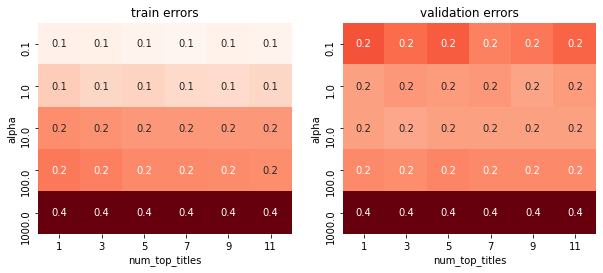

In [31]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=num_top_titles_s)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=num_top_titles_s)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha');

Nhận xét về ảnh hưởng của siêu tham số `alpha` (có sao thì bạn nói vậy, chỗ nào không biết thì nói là không biết): 
- Bạn kỳ vọng khi `alpha` thay đổi thì độ lỗi trên tập huấn luyện và tập validation sẽ thay đổi như thế nào? Tại sao bạn lại kỳ vọng như vậy?
- Kết quả ở trên có giống như kỳ vọng của bạn không? Nếu không thì bạn nghĩ xem tại sao lại như vậy?

YOUR ANSWER HERE

Đối với siêu tham số alpha.
<br>
Trên tập huấn luyện, ta kỳ vọng khi alpha càng tăng thì độ lỗi sẽ tăng theo.
<br>
Trên tập validation, ta kỳ vọng khi độ lỗi sẽ đạt min khi alpha ở điểm "giữa" (tức là khi alpha tăng lên hay giảm xuống xa dần điểm đó, độ lỗi tăng lên).
<br>
Bởi vì khi trên tập huấn luyện, alpha càng nhỏ, tức là mô hình fit càng tốt, nên độ lỗi càng nhỏ. Điều này vô tình khiến cho mô hình fit vào cả những nhiễu, vô tình khiến cho độ lỗi trên tập validation cao.
<br>
Còn khi alpha quá lớn thì mô hình sẽ bị kìm hãm quá mức, không fit được nhiễu nhưng cũng không fit được cái nên fit, chính vì điều này nên độ lỗi trên cả 2 tập đều tăng cao.

Nhận xét về ảnh hưởng của siêu tham số `num_top_titles` (có sao thì bạn nói vậy, chỗ nào không biết thì nói là không biết): 
- Bạn kỳ vọng khi `num_top_titles` thay đổi thì độ lỗi trên tập huấn luyện và tập validation sẽ thay đổi như thế nào? Tại sao bạn lại kỳ vọng như vậy?
- Kết quả ở trên có giống như kỳ vọng của bạn không? Nếu không thì bạn nghĩ xem tại sao lại như vậy?

YOUR ANSWER HERE

Đối với siêu tham số num_top_titles.
<br>
Ta kỳ vọng khi tăng num_top_titles lên thì độ lỗi trên tập huấn luyện và tập validation giảm xuống. Nguyên nhân vì khi tăng num_top_titles dữ liệu càng sát với dữ liệu đầu vào, chính vì thế độ lỗi càng giảm.
<br>
Tuy nhiên kết quả không giống như chúng ta kỳ vọng. Trong một số trường hợp thì khi num_top_titles nhỏ lại cho độ lỗi thấp hơn, nguyên nhân và vì khi tăng num_top_titles lên ta đã mã hóa cả 1 giá trị chỉ có rất ít lần xuất hiện, điều này khiến cho mô hình bị overfit.

Cuối cùng, bạn sẽ huấn luyện lại `full_pipeline` trên `X_df` và `y_sr` (tập huấn luyện + tập validation) với `best_alpha` và `best_num_top_titles` tìm được ở trên để ra được mô hình cụ thể cuối cùng.

In [32]:
# YOUR CODE HERE
full_pipeline.set_params(coladderdropper__num_top_titles=best_num_top_titles, mlpclassifier__alpha=best_alpha)
full_pipeline.fit(X_df,y_sr)
#raise NotImplementedError()

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_titles=3)),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer-1',
                                                  SimpleImputer(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked', 'Title']),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Pclass'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=10,
                               hidden_layer_sizes=20, max_iter=2500,
                               random_state=0, solver='lbfgs'))])

### Đánh giá mô hình tìm được (1đ)
Bạn sẽ dùng mô hình cụ thể cuối cùng ở trên để dự đoán với các input trong tập test (file "test.csv") và submit kết quả dự đoán lên Kaggle. Để có thể submit thì bạn phải tạo ra file csv có 2 cột: cột thứ nhất là id của các hành khách trong tập test, cột thứ hai là giá trị dự đoán của bạn (1 - sống, và 0 - chết). Bạn có thể xem file mẫu `submission.csv` mà mình đính kèm. Bạn đặt tên file của bạn là `my_preds.csv`.

In [33]:
# YOUR CODE HERE
#raise NotImplementedError()
test_data_df = pd.read_csv('test.csv', 
                      index_col=0) # Cho cột index là cột 0 (PassengerId)
result_ = full_pipeline.predict(test_data_df)
frame = { 'PassengerId': test_data_df.index, 'Survived': pd.Series(result_)}
final  = pd.DataFrame(frame)
final.to_csv('my_preds.csv', index = False)

In [34]:
# TEST
my_preds_df = pd.read_csv('my_preds.csv', index_col=0)
assert round(my_preds_df['Survived'].mean(), 3) == 0.366
assert np.all(my_preds_df.iloc[:5].values.reshape(-1) == np.array([0, 0, 0, 0, 1]))

Kế đến, bạn sẽ submit file csv chứa kết quả dự đoán lên [Kaggle](https://www.kaggle.com/c/titanic) (bạn sẽ cần tạo một account trên Kaggle), và ghi nhận lại độ lỗi trên tập test ở cell phía dưới (score trên Kaggle là độ chính xác).

0.23445